In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class XORNeuralNetwork:
    def __init__(self, learning_rate=0.5):
        self.learning_rate = learning_rate
        self.weights_input_hidden = np.random.uniform(-1, 1, (2, 2))
        self.weights_hidden_output = np.random.uniform(-1, 1, (2, 1))

        self.bias_hidden = np.random.uniform(-1, 1, (1, 2))
        self.bias_output = np.random.uniform(-1, 1, (1, 1))

        self.error_history = []

    def sigmoid(self, x):
        x=np.clip(x,-500,500)
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def forward_pass(self, X):
        self.hidden_input = np.dot(X, self.weights_input_hidden) + self.bias_hidden
        self.hidden_output = self.sigmoid(self.hidden_input)

        self.final_input = np.dot(self.hidden_output, self.weights_hidden_output) + self.bias_output
        self.final_output = self.sigmoid(self.final_input)
        return self.final_output
    def backward_pass(self,X,y,final_output):
        m=X.shape[0]
        output_error = y - self.final_output
        output_delta = output_error * self.sigmoid_derivative(self.final_output)

        # Calculate hidden layer error
        hidden_error = output_delta.dot(self.weights_hidden_output.T)
        hidden_delta = hidden_error * self.sigmoid_derivative(self.hidden_output)
        
        self.weights_hidden_output += self.hidden_output.T.dot(output_delta) * self.learning_rate/m
        self.bias_output += np.sum(output_delta, axis=0, keepdims=True) * self.learning_rate/m

        self.weights_input_hidden += self.input.T.dot(hidden_delta) * self.learning_rate/m
        self.bias_hidden += np.sum(hidden_delta, axis=0, keepdims=True) * self.learning_rate/m

    def train(self, X, y, epochs=10000,print_every=1000):
        for epoch in range(epochs):
            final_output=self.forward_pass(X)
            mse=np.mean((y-final_output)**2)
            self.error_history.append(mse)
            self.backward_pass(X,y,final_output)
            if epoch % print_every==0:
                print(f"Epoch {eopch},Error:{mse:.6f}")
     def predict(self, X):
        return self.forward_pass(X)
      def print_results(self, X, y):
        predictions = self.predict(X)
        print("\nFinal Results:")
        print("-" * 40)
        print("Input -> Target | Predicted -> Rounded")

        for i in range(len(X)):
            predicted_val = predictions[i][0]
            rounded_val = round(predicted_val)
            print(f"{X[i]} -> {y[i][0]:.0f} | {predicted_val:.4f} -> {rounded_val}")

        rounded
        
    

Epoch 0, Error: 0.369956
Epoch 2000, Error: 0.217600
Epoch 4000, Error: 0.004335
Epoch 6000, Error: 0.001720
Epoch 8000, Error: 0.001050

Final Results:
----------------------------------------
Input -> Target | Predicted -> Rounded
[0 0] -> 0 | 0.0275 -> 0
[0 1] -> 1 | 0.9690 -> 1
[1 0] -> 1 | 0.9739 -> 1
[1 1] -> 0 | 0.0245 -> 0

Accuracy: 100.0%


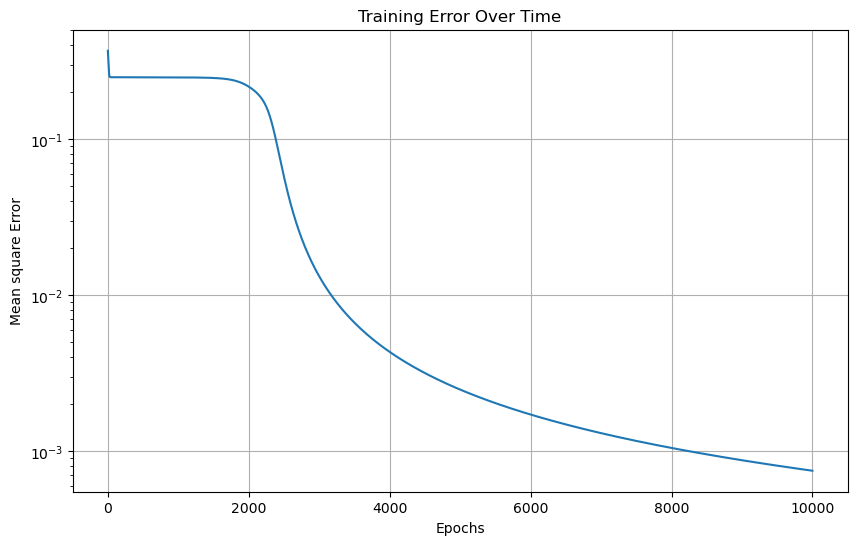


Learned Weights:
Input to Hidden:
[[ 6.01418263  5.18321359]
 [-5.95828528 -5.41660882]]
Hidden to Output:
[[-8.31367943]
 [ 8.80721291]]
Hidden Bias: [[ 3.05486355 -2.80400784]]
Output Bias: [[3.87067246]]


In [8]:
import numpy as np
import matplotlib.pyplot as plt

class XORNeuralNetwork:
    def __init__(self, learning_rate=0.5):
        # Initialize neural network for XOR problem
        # Architecture: 2 inputs → 2 hidden neurons → 1 output
        self.learning_rate = learning_rate

        # Initialize weights randomly (small values)
        # Input to hidden layer weights (2x2 matrix)
        self.weights_input_hidden = np.random.uniform(-1, 1, (2, 2))

        # Hidden to output layer weights (2x1 matrix)
        self.weights_hidden_output = np.random.uniform(-1, 1, (2, 1))

        # Biases
        self.bias_hidden = np.random.uniform(-1, 1, (1, 2))
        self.bias_output = np.random.uniform(-1, 1, (1, 1))

        # Store training history
        self.error_history = []

    def sigmoid(self, x):
        """Sigmoid activation function"""
        x = np.clip(x, -500, 500)  # prevent overflow
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        """Derivative of sigmoid function"""
        return x * (1 - x)

    def forward_pass(self, x):
        """
        Forward propagation through network
        """
        # Input to hidden layer
        self.hidden_input = np.dot(x, self.weights_input_hidden) + self.bias_hidden
        self.hidden_output = self.sigmoid(self.hidden_input)

        # Hidden to output layer
        self.output_input = np.dot(self.hidden_output, self.weights_hidden_output) + self.bias_output
        self.predicted_output = self.sigmoid(self.output_input)

        return self.predicted_output

    def backward_pass(self, X, y, predicted_output):
        # Backward propagation to calculate gradients and update weights
        m = X.shape[0]  # Number of training examples

        # Calculate output layer error
        output_error = y - predicted_output
        output_delta = output_error * self.sigmoid_derivative(predicted_output)

        # Calculate hidden layer error
        hidden_error = output_delta.dot(self.weights_hidden_output.T)
        hidden_delta = hidden_error * self.sigmoid_derivative(self.hidden_output)

        # Update weights and biases (using average gradients)
        self.weights_hidden_output += self.hidden_output.T.dot(output_delta) * self.learning_rate / m
        self.bias_output += np.sum(output_delta, axis=0, keepdims=True) * self.learning_rate / m

        self.weights_input_hidden += X.T.dot(hidden_delta) * self.learning_rate / m
        self.bias_hidden += np.sum(hidden_delta, axis=0, keepdims=True) * self.learning_rate / m

    def train(self, X, y, epochs=10000, print_every=1000):
        # Train the neural network using backpropagation
        for epoch in range(epochs):
            # Forward pass
            predicted_output = self.forward_pass(X)

            # Calculate mean squared error
            mse = np.mean((y - predicted_output) ** 2)
            self.error_history.append(mse)

            # Backward pass
            self.backward_pass(X, y, predicted_output)

            # Print progress
            if epoch % print_every == 0:
                print(f"Epoch {epoch}, Error: {mse:.6f}")

    def predict(self, X):
        """Make predictions on new data"""
        return self.forward_pass(X)
    
    def predict(self, X):
        """Make predictions on new data"""
        return self.forward_pass(X)

        
    def print_results(self, X, y):
        """Print final results"""
        predictions = self.predict(X)

        print("\nFinal Results:")
        print("-" * 40)
        print("Input -> Target | Predicted -> Rounded")

        for i in range(len(X)):
            predicted_val = predictions[i][0]
            rounded_val = round(predicted_val)
            print(f"{X[i]} -> {y[i][0]:.0f} | {predicted_val:.4f} -> {rounded_val}")
            
        # Calculate accuracy
        rounded_predictions =np.round(predictions)
        accuracy = np.mean (rounded_predictions == y)*100
        print(f"\nAccuracy: {accuracy:.1f}%")

def main():
    X = np.array([[0, 0],
                  [0, 1],
                  [1, 0],
                  [1, 1]])
    y = np.array([[0], [1], [1], [0]])

    nn = XORNeuralNetwork(learning_rate=1.0)
    nn.train(X, y, epochs=10000,print_every=2000)
    nn.print_results(X,y)
    plt.figure(figsize=(10,6))
    plt.plot(nn.error_history)
    plt.title('Training Error Over Time')
    plt.xlabel('Epochs')
    plt.ylabel('Mean square Error')
    plt.yscale('log')
    plt.grid(True)
    plt.show()


    print(f"\nLearned Weights:")
    print(f"Input to Hidden:\n{nn.weights_input_hidden}")
    print(f"Hidden to Output:\n{nn.weights_hidden_output}")
    print(f"Hidden Bias: {nn.bias_hidden}")
    print(f"Output Bias: {nn.bias_output}")

if __name__ == "__main__":
    main()



   